# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#from category_encoders import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
#since im using google_colab, i have to mount the gdrive folder for accessing the files

#from google.colab import drive
#drive.mount('/content/gdrive')

In [3]:
#reading the datasets, i have taken only 5000 datapoints into consideration for avoiding mermory issues

project_data = pd.read_csv('/home/pritam_sk/pritam_sk_files/AAI/Assignments/Assignments_DonorsChoose_2018/train_data.csv' , nrows=50000)
resource_data = pd.read_csv('/home/pritam_sk/pritam_sk_files/AAI/Assignments/Assignments_DonorsChoose_2018/resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

      project_subject_categories project_subject_subcategories  \
473             Applied Learning             Early Development   
41558        Literacy & Language                      Literacy   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  
473                                               2                    1  
41558                                             2                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   

        clean_categories clean_subcategories  \
473      AppliedLearning    EarlyDevelopment   
41558  Literacy_Language            Literacy   

                                                   essay  
473    I recently read an article about giving studen...  
41558  My students crave challenge, they eat obstacle...

In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
#print(project_data['essay'].values[99999])
#print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

I teach at a Title 1 school, with 73% of my students who receive free/reduced lunch. Our school provides free breakfast for all students. I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52% students with special needs. The disabilities include Autism Spectrum Disorder, Speech Impaired, Language Impaired, Other Health Impaired (ADHD), and Developmentally Delayed. I also have about 42% of my students who are English Language Learners.\r\n\r\n\"Self-motivated learners\" is a synonym of \"my students\".  They love to learn and they possess a positive outlook and attitude in school. Almost everyday, my students would ask me, \"Ms. Perez, what are we going to learn today?\" I could not ask for a better greeting from my students.This project will greatly impact my students’ learning on a daily basis. The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lesson

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I teach at a Title 1 school, with 73% of my students who receive free/reduced lunch. Our school provides free breakfast for all students. I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52% students with special needs. The disabilities include Autism Spectrum Disorder, Speech Impaired, Language Impaired, Other Health Impaired (ADHD), and Developmentally Delayed. I also have about 42% of my students who are English Language Learners.     Self-motivated learners  is a synonym of  my students .  They love to learn and they possess a positive outlook and attitude in school. Almost everyday, my students would ask me,  Ms. Perez, what are we going to learn today?  I could not ask for a better greeting from my students.This project will greatly impact my students’ learning on a daily basis. The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lessons and disc

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I teach at a Title 1 school with 73 of my students who receive free reduced lunch Our school provides free breakfast for all students I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52 students with special needs The disabilities include Autism Spectrum Disorder Speech Impaired Language Impaired Other Health Impaired ADHD and Developmentally Delayed I also have about 42 of my students who are English Language Learners Self motivated learners is a synonym of my students They love to learn and they possess a positive outlook and attitude in school Almost everyday my students would ask me Ms Perez what are we going to learn today I could not ask for a better greeting from my students This project will greatly impact my students learning on a daily basis The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lessons and discussions Despite the fact that stud

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:34<00:00, 1457.48it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'teach title 1 school 73 students receive free reduced lunch school provides free breakfast students special education certified teacher teach kindergarten general education setting class consists 52 students special needs disabilities include autism spectrum disorder speech impaired language impaired health impaired adhd developmentally delayed also 42 students english language learners self motivated learners synonym students love learn possess positive outlook attitude school almost everyday students would ask ms perez going learn today could not ask better greeting students project greatly impact students learning daily basis wobble chairs provide assistance students difficulties focusing attending lessons discussions despite fact students participate physical activities p e recess gonoodle dance videos sessions classroom students still energy stand wiggle seats lessons due special needs beyond students control lot distraction student learning not really achieved full potential lac

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also

from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:01<00:00, 30846.75it/s]


## 1.5 Preparing data for models

In [21]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### Modifying DataSet (essay & project_title)

In [22]:
project_data['clean_essay'] = preprocessed_essays
project_data['clean_project_title'] = preprocessed_project_title
project_data.drop(['essay'], axis=1, inplace=True)
project_data.drop(['project_title'], axis=1, inplace=True)

In [23]:
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   

    school_state                Date project_grade_category  \
473           GA 2016-04-27 00:53:00          Grades PreK-2   

                                       project_essay_1  \
473  I recently read an article about giving studen...   

                                       project_essay_2  \
473  I teach at a low-income (Title 1) school. Ever...   

                                       project_essay_3  \
473  We need a classroom rug that we can use as a c...   

                                       project_essay_4  \
473  Benjamin Franklin once said, \"Tell me and I f...   

                              project_resource_summary  \
473  My students need flexible seating in the class...   

     teacher_number_of_previously_posted_projects  project_is_approved  \
473                                             2                    1   

    clean_categories clean_subcategories  \
473  AppliedLearning    EarlyDevelopment   

                                           clean_essay  \
473  recently read article giving students choice l...   

                    clean_project_title  
473  flexible seating flexible learning

In [24]:
y = project_data['project_is_approved'].values
#project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   

    school_state                Date project_grade_category  \
473           GA 2016-04-27 00:53:00          Grades PreK-2   

                                       project_essay_1  \
473  I recently read an article about giving studen...   

                                       project_essay_2  \
473  I teach at a low-income (Title 1) school. Ever...   

                                       project_essay_3  \
473  We need a classroom rug that we can use as a c...   

                                       project_essay_4  \
473  Benjamin Franklin once said, \"Tell me and I f...   

                              project_resource_summary  \
473  My students need flexible seating in the class...   

     teacher_number_of_previously_posted_projects  project_is_approved  \
473                                             2                    1   

    clean_categories clean_subcategories  \
473  AppliedLearning    EarlyDevelopment   

                                           clean_essay  \
473  recently read article giving students choice l...   

                    clean_project_title  
473  flexible seating flexible learning

In [25]:
X = project_data

In [26]:
X = X.fillna(X['teacher_prefix'].value_counts().index[0])

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [27]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
    
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)    

In [28]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
18361       68639  p104508  c49a7e388c5c9d986519c358a51cc416            Ms.   
19899       47902  p069643  c57bbaffc7d707274e84715c73bffccf            Ms.   

      school_state                Date project_grade_category  \
18361           NY 2017-04-05 11:16:47             Grades 3-5   
19899           CA 2017-02-08 17:43:12            Grades 9-12   

                                         project_essay_1  \
18361  Our students are amazing!  Most of our student...   
19899  Our school is 65% free and reduced lunch, most...   

                                         project_essay_2 project_essay_3  \
18361  Students in the transitional phase of reading ...            Mrs.   
19899  The goal of our class is to teach students to ...            Mrs.   

      project_essay_4                           project_resource_summary  \
18361            Mrs.  My students need high-interest, engaging ficti...   
19899            Mrs.  My students need instruction and  practice in ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
18361                                             7                    1   
19899                                             4                    1   

                   clean_categories              clean_subcategories  \
18361             Literacy_Language                         Literacy   
19899  AppliedLearning SpecialNeeds  College_CareerPrep SpecialNeeds   

                                             clean_essay  \
18361  students amazing students english language lea...   
19899  school 65 free reduced lunch students english ...   

                  clean_project_title  
18361  engaging books engaged readers  
19899              operation organize

In [29]:
resource_data.head(1)

id                                        description  quantity  price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.0

In [30]:
#!pip install category-encoders

## Response Coding

In [32]:
def responseTable(table, col) :
    cat = table[col].unique()
    
    freqP = []
    for i in cat : 
        freqP.append(len(table.loc[(table[col] == i) & (table['project_is_approved'] == 1)]))
        
        
    freqN = []
    for i in cat : 
        freqN.append(len(table.loc[(table[col] == i) & (table['project_is_approved'] == 0)]))
        
    
    encodedP = []
    for i in range(len(cat)) :
        encodedP.append(freqP[i]/(freqP[i] + freqN[i]))
    
    encodedN = []
    encodedN[:] = [1 - x for x in encodedP]
        
    encodedPVAL = dict(zip(cat, encodedP)) 
    encodedNVAL = dict(zip(cat, encodedN)) 
    
    return encodedPVAL, encodedNVAL
        

In [33]:
def responseCoding(table) : 
    posCC, negCC = responseTable(table,'clean_categories')
    posCSC, negCSC = responseTable(table,'clean_subcategories')
    posSS, negSS = responseTable(table, 'school_state')
    posTP, negTP = responseTable(table, 'teacher_prefix')
    posPGC, negPGC = responseTable(table, 'project_grade_category')
    
    df = pd.DataFrame()
    df['ccP'] = table['clean_categories'].map(posCC)
    df['ccN'] = table['clean_categories'].map(negCC)
    df['cscP'] = table['clean_subcategories'].map(posCSC)
    df['cscN'] = table['clean_subcategories'].map(negCSC)
    df['ssP'] = table['school_state'].map(posSS)
    df['ssN'] = table['school_state'].map(negSS)
    df['tpP'] = table['teacher_prefix'].map(posTP)
    df['tpN'] = table['teacher_prefix'].map(negTP)
    df['pgcP'] = table['project_grade_category'].map(posPGC)
    df['pgcN'] = table['project_grade_category'].map(negPGC)

    return df

In [34]:
newTR = responseCoding(X_train)
newTE = responseCoding(X_test)

In [35]:
newTR.head(2)

ccP       ccN      cscP      cscN       ssP       ssN      tpP  \
18361  0.858459  0.141541  0.880889  0.119111  0.854965  0.145035  0.84391   
19899  0.805804  0.194196  0.769231  0.230769  0.855466  0.144534  0.84391   

           tpN      pgcP      pgcN  
18361  0.15609  0.852015  0.147985  
19899  0.15609  0.836271  0.163729

In [36]:
newTE.head(2)

ccP       ccN      cscP      cscN       ssP       ssN       tpP  \
46498  0.841073  0.158927  0.883234  0.116766  0.814490  0.185510  0.852766   
27792  0.837696  0.162304  0.798722  0.201278  0.857202  0.142798  0.852766   

            tpN      pgcP      pgcN  
46498  0.147234  0.847972  0.152028  
27792  0.147234  0.853615  0.146385

In [37]:
len(newTE)

16500

In [38]:
def mergeEnc(table, p, n) :
    lsP = table[p].values.tolist()
    lsN = table[n].values.tolist()
    frame = pd.DataFrame(list(zip(lsN, lsP)))
    
    return frame

### clean_categories

In [39]:
X_train_cc_ohe = mergeEnc(newTR, 'ccP', 'ccN')
X_test_cc_ohe = mergeEnc(newTE, 'ccP', 'ccN')

In [40]:
X_test_cc_ohe.shape

(16500, 2)

### clean_subcategories

In [41]:
X_train_csc_ohe = mergeEnc(newTR, 'cscP', 'cscN')
X_test_csc_ohe = mergeEnc(newTE, 'cscP', 'cscN')

### school_state

In [42]:
X_train_state_ohe = mergeEnc(newTR, 'ssP', 'ssN')
X_test_state_ohe = mergeEnc(newTE, 'ssP', 'ssN')

### teacher_prefix



In [43]:
X_train_teacher_ohe = mergeEnc(newTR, 'tpP', 'tpN')
X_test_teacher_ohe = mergeEnc(newTE, 'tpP', 'tpN')

### project_grade_category

In [44]:
X_train_grade_ohe = mergeEnc(newTR, 'pgcP', 'pgcN')
X_test_grade_ohe = mergeEnc(newTE, 'pgcP', 'pgcN')

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>



#### 1.5.2.1 Bag of words

### essays

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['clean_essay'].values)
#X_cv_essay_bow = vectorizer.transform(X_cv['clean_essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['clean_essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
#print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 5000) (33500,)
(16500, 5000) (16500,)


### project_title

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['clean_project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_pt_bow = vectorizer.transform(X_train['clean_project_title'].values)
#X_cv_pt_bow = vectorizer.transform(X_cv['clean_project_title'].values)
X_test_pt_bow = vectorizer.transform(X_test['clean_project_title'].values)

print("After vectorizations")
print(X_train_pt_bow.shape, y_train.shape)
#print(X_cv_pt_bow.shape, y_cv.shape)
print(X_test_pt_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1643) (33500,)
(16500, 1643) (16500,)


#### 1.5.2.2 TFIDF vectorizer

### essays

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
X_train_essay_tfidf = vectorizer.fit_transform(X_train['clean_essay'].values)
#X_cv_essay_tfidf = vectorizer.transform(X_cv['clean_essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['clean_essay'].values)




print("Shape of matrix after one hot encodig ",X_train_essay_tfidf.shape)
#print("Shape of matrix after one hot encodig ",X_cv_essay_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_test_essay_tfidf.shape)

Shape of matrix after one hot encodig  (33500, 5000)
Shape of matrix after one hot encodig  (16500, 5000)


### project_title

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
X_train_pt_tfidf = vectorizer.fit_transform(X_train['clean_project_title'].values)
#X_cv_pt_tfidf = vectorizer.transform(X_cv['clean_project_title'].values)
X_test_pt_tfidf = vectorizer.transform(X_test['clean_project_title'].values)




print("Shape of matrix after one hot encodig ",X_train_pt_tfidf.shape)
#print("Shape of matrix after one hot encodig ",X_cv_pt_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_test_pt_tfidf.shape)

Shape of matrix after one hot encodig  (33500, 1643)
Shape of matrix after one hot encodig  (16500, 1643)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

### essays

#### Train

In [50]:
i=0
list_of_sentanceTrain=[]
for sentance in X_train['clean_essay']:
    list_of_sentanceTrain.append(sentance.split())

In [51]:
is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentanceTrain,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    #print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        #print(w2v_model.wv.most_similar('great'))
        #print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")


[('amazing', 0.724392294883728), ('wonderful', 0.6872593760490417), ('awesome', 0.6678673028945923), ('excellent', 0.6562472581863403), ('incredible', 0.6044714450836182), ('fantastic', 0.5930913090705872), ('good', 0.5704745054244995), ('better', 0.5495328903198242), ('powerful', 0.5308737754821777), ('huge', 0.5089092254638672)]


In [52]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  14606
sample words  ['students', 'amazing', 'english', 'language', 'learners', 'many', 'parents', 'relatively', 'recent', 'immigrants', 'america', 'dedicated', 'studious', 'love', 'learn', 'laugh', 'approach', 'learning', 'great', 'enthusiasm', 'school', 'low', 'income', 'neighborhood', 'brooklyn', 'work', 'one', 'job', 'make', 'ends', 'meet', 'prioritize', 'children', 'education', 'else', 'uncertain', 'times', 'immigrant', 'families', 'know', 'safe', 'place', 'transitional', 'phase', 'reading', 'begun', 'crack', 'code', 'sounding', 'words']


In [53]:
sent_vectorsPPE_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentanceTrain): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectorsPPE_train.append(sent_vec)
print(len(sent_vectorsPPE_train))
print(len(sent_vectorsPPE_train[0]))

100%|██████████| 33500/33500 [03:23<00:00, 164.92it/s]

33500
50


#### Test

In [54]:
i=0
list_of_sentanceTest=[]
for sentance in X_test['clean_essay']:
    list_of_sentanceTest.append(sentance.split())

In [55]:
is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentanceTest,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")


[('amazing', 0.6708002686500549), ('awesome', 0.6671853065490723), ('wonderful', 0.6663811206817627), ('incredible', 0.6444535255432129), ('good', 0.624991774559021), ('excellent', 0.5534008741378784), ('perfect', 0.5298848748207092), ('fantastic', 0.5077130198478699), ('exciting', 0.4997880458831787), ('positive', 0.4992569386959076)]
[('toughest', 0.8009600639343262), ('barbara', 0.7871096134185791), ('notorious', 0.7857145071029663), ('cancer', 0.7817404270172119), ('norm', 0.763033390045166), ('violent', 0.7610040903091431), ('horrific', 0.7605330348014832), ('unfair', 0.7567136287689209), ('harm', 0.7562559843063354), ('unprecedented', 0.7517061233520508)]


In [56]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  11110
sample words  ['majority', 'students', 'eat', 'breakfast', 'lunch', 'every', 'day', 'school', 'cafeteria', 'classroom', 'consists', '20', 'bright', 'eyed', 'first', 'grade', 'vary', 'abilities', 'teach', 'inclusion', 'specific', 'learning', 'disabilities', 'english', 'speakers', 'languages', 'esol', 'gifted', 'general', 'education', 'even', 'though', 'differ', 'background', 'knowledge', 'capabilities', 'interests', 'special', 'talents', 'come', 'ready', 'eager', 'learn', 'sit', 'somewhere', 'else', 'ca', 'not', 'stand', 'questions']


In [57]:
sent_vectorsPPE_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentanceTest): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectorsPPE_test.append(sent_vec)
print(len(sent_vectorsPPE_test))
print(len(sent_vectorsPPE_test[0]))
        

100%|██████████| 16500/16500 [01:27<00:00, 187.93it/s]

16500
50


### project_title

#### Train

In [58]:
# Similarly you can vectorize for title also

# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentancePTtrain=[]
for sentance in X_train['clean_project_title']:
    list_of_sentancePTtrain.append(sentance.split())

In [59]:
is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

try :
  
  
  if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentancePTtrain,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))
    
  elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")
        
except KeyError :
  
  pass
  
finally :
  
  print("Execution Done")
  
  

[('home', 0.989499568939209), ('nook', 0.9875926375389099), ('clubs', 0.9866288900375366), ('at', 0.9861554503440857), ('chrome', 0.9851367473602295), ('in', 0.9849813580513), ('bins', 0.9842649102210999), ('shelf', 0.9830933809280396), ('right', 0.9827001690864563), ('news', 0.9821661710739136)]
Execution Done


In [60]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  2708
sample words  ['engaging', 'books', 'engaged', 'readers', 'operation', 'organize', 'imagination', 'creation', 'station', 'classroom', 'technology', 'flexible', 'seating', 'first', 'graders', 'enthusiastic', 'teacher', 'seeks', 'supplies', 'deserving', 'students', 'organizing', 'our', 'needs', 'all', 'good', 'time', 'before', 'wants', 'us', 'together', 'music', 'mastering', 'material', 'groups', 'whiteboards', 'please', 'help', 'library', 'alternative', 'learning', 'drum', 'healthy', 'minds', 'hearts', 'bellies', 'listen', 'read', 'learn', 'art']


In [61]:
sent_vectorsPT_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentancePTtrain): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectorsPT_train.append(sent_vec)
print(len(sent_vectorsPT_train))
print(len(sent_vectorsPT_train[0]))

100%|██████████| 33500/33500 [00:03<00:00, 8475.53it/s]

33500
50


#### Test

In [62]:
i=0
list_of_sentancePT_test=[]
for sentance in X_test['clean_project_title']:
    list_of_sentancePT_test.append(sentance.split())

In [63]:
# Using Google News Word2Vectors

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.


# http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W17SRFAzZPY
# you can comment this whole cell
# or change these varible according to your need

is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentancePT_test,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    #print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")


[('create', 0.9996819496154785), ('history', 0.9996788501739502), ('storage', 0.9996318817138672), ('readers', 0.9996055960655212), ('robots', 0.9996052980422974), ('getting', 0.9996014833450317), ('story', 0.9996010661125183), ('table', 0.9995981454849243), ('project', 0.9995973110198975), ('from', 0.9995965957641602)]


In [64]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  1749
sample words  ['movin', 'groovin', '1st', 'the', 'art', 'print', 'making', 'a', 'ceramics', 'lab', 'missing', 'listen', 'up', 'full', 'steam', 'ahead', 'bouncing', 'success', 'stability', 'ball', 'chairs', 'we', 'out', 'school', 'supplies', '1', 'chromebooks', 'lets', 'get', 'moving', 'building', 'healthy', 'brains', 'bodies', 'so', 'much', 'fun', 'many', 'distractions', 'techie', 'students', 'need', 'colored', 'printer', 'basketball', 'books', 'bags', 'color', 'us', 'happy']


In [65]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectorsPT_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentancePT_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectorsPT_test.append(sent_vec)
print(len(sent_vectorsPT_test))
print(len(sent_vectorsPT_test[0]))

100%|██████████| 16500/16500 [00:01<00:00, 9671.67it/s]

16500
50


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

### essays

#### Train

In [66]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(X_train['clean_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [67]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_essay_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentanceTrain): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_essay_train.append(sent_vec)
    row += 1

100%|██████████| 33500/33500 [34:16<00:00, 16.75it/s]


#### Test

In [68]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(X_test['clean_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [69]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_essay_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentanceTest): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_essay_test.append(sent_vec)
    row += 1

100%|██████████| 16500/16500 [11:42<00:00, 23.49it/s]


### project_title

#### Train

In [70]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(X_train['clean_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [71]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectorsPT_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentancePTtrain): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectorsPT_train.append(sent_vec)
    row += 1

100%|██████████| 33500/33500 [00:17<00:00, 1944.00it/s]


#### Test

In [72]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(X_test['clean_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [73]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectorsPT_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentancePT_test): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectorsPT_test.append(sent_vec)
    row += 1

100%|██████████| 16500/16500 [00:06<00:00, 2575.10it/s]


### 1.5.3 Vectorizing Numerical features

### price

In [74]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')
#X_cv = pd.merge(X_cv, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [75]:
X_train.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0       68639  p104508  c49a7e388c5c9d986519c358a51cc416            Ms.   

  school_state                Date project_grade_category  \
0           NY 2017-04-05 11:16:47             Grades 3-5   

                                     project_essay_1  \
0  Our students are amazing!  Most of our student...   

                                     project_essay_2 project_essay_3  \
0  Students in the transitional phase of reading ...            Mrs.   

  project_essay_4                           project_resource_summary  \
0            Mrs.  My students need high-interest, engaging ficti...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             7                    1   

    clean_categories clean_subcategories  \
0  Literacy_Language            Literacy   

                                         clean_essay  \
0  students amazing students english language lea...   

              clean_project_title   price  quantity  
0  engaging books engaged readers  113.46         3

In [76]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
#X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
#print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


### tnppp

In [77]:
from sklearn.preprocessing import Normalizer
normalizerT = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizerT.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_tnppp_norm = normalizerT.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
#X_cv_tnppp_norm = normalizerT.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_tnppp_norm = normalizerT.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_tnppp_norm.shape, y_train.shape)
#print(X_cv_tnppp_norm.shape, y_cv.shape)
print(X_test_tnppp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

#### SET1

In [78]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr1 = hstack((X_train_cc_ohe, X_train_csc_ohe, X_train_grade_ohe, X_train_price_norm, X_train_tnppp_norm, X_train_essay_bow, X_train_pt_bow)).tocsr()
#X_cr1 = hstack((X_cv_cc_ohe, X_cv_csc_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_tnppp_norm, X_cv_essay_bow, X_cv_pt_bow)).tocsr()
X_te1 = hstack((X_test_cc_ohe, X_test_csc_ohe, X_test_grade_ohe, X_test_price_norm, X_test_tnppp_norm, X_test_essay_bow, X_test_pt_bow)).tocsr()

print("Final Data matrix")
print(X_tr1.shape, y_train.shape)
#print(X_cr1.shape, y_cv.shape)
print(X_te1.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 6651) (33500,)
(16500, 6651) (16500,)


#### SET2

In [79]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr2 = hstack((X_train_cc_ohe, X_train_csc_ohe, X_train_grade_ohe, X_train_price_norm, X_train_tnppp_norm, X_train_essay_tfidf, X_train_pt_tfidf)).tocsr()
#X_cr2 = hstack((X_cv_cc_ohe, X_cv_csc_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_tnppp_norm, X_cv_essay_tfidf, X_cv_pt_tfidf)).tocsr()
X_te2 = hstack((X_test_cc_ohe, X_test_csc_ohe, X_test_grade_ohe, X_test_price_norm, X_test_tnppp_norm, X_test_essay_tfidf, X_test_pt_tfidf)).tocsr()

print("Final Data matrix")
print(X_tr2.shape, y_train.shape)
#print(X_cr2.shape, y_cv.shape)
print(X_te2.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 6651) (33500,)
(16500, 6651) (16500,)


#### SET3

In [80]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr3 = hstack((X_train_cc_ohe, X_train_csc_ohe, X_train_grade_ohe, X_train_price_norm, X_train_tnppp_norm, sent_vectorsPPE_train, sent_vectorsPT_train)).tocsr()
#X_cr3 = hstack((X_cv_cc_ohe, X_cv_csc_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_tnppp_norm, sent_vectorsPPE_cv, sent_vectorsPT_cv)).tocsr()
X_te3 = hstack((X_test_cc_ohe, X_test_csc_ohe, X_test_grade_ohe, X_test_price_norm, X_test_tnppp_norm, sent_vectorsPPE_test, sent_vectorsPT_test)).tocsr()

print("Final Data matrix")
print(X_tr3.shape, y_train.shape)
#print(X_cr3.shape, y_cv.shape)
print(X_te3.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 108) (33500,)
(16500, 108) (16500,)


#### SET4

In [81]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr4 = hstack((X_train_cc_ohe, X_train_csc_ohe, X_train_grade_ohe, X_train_price_norm, X_train_tnppp_norm, tfidf_sent_vectors_essay_train, tfidf_sent_vectorsPT_train)).tocsr()
#X_cr4 = hstack((X_cv_cc_ohe, X_cv_csc_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_tnppp_norm, tfidf_sent_vectors_essay_cv, tfidf_sent_vectorsPT_cv)).tocsr()
X_te4 = hstack((X_test_cc_ohe, X_test_csc_ohe, X_test_grade_ohe, X_test_price_norm, X_test_tnppp_norm, tfidf_sent_vectors_essay_test, tfidf_sent_vectorsPT_test)).tocsr()

print("Final Data matrix")
print(X_tr4.shape, y_train.shape)
#print(X_cr4.shape, y_cv.shape)
print(X_te4.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 108) (33500,)
(16500, 108) (16500,)


# Assignment 9: RF and GBDT

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [82]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier()


parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}

clf1 = GridSearchCV(rfc1, parameters, cv=3, scoring='roc_auc')
se1 = clf1.fit(X_tr1, y_train)

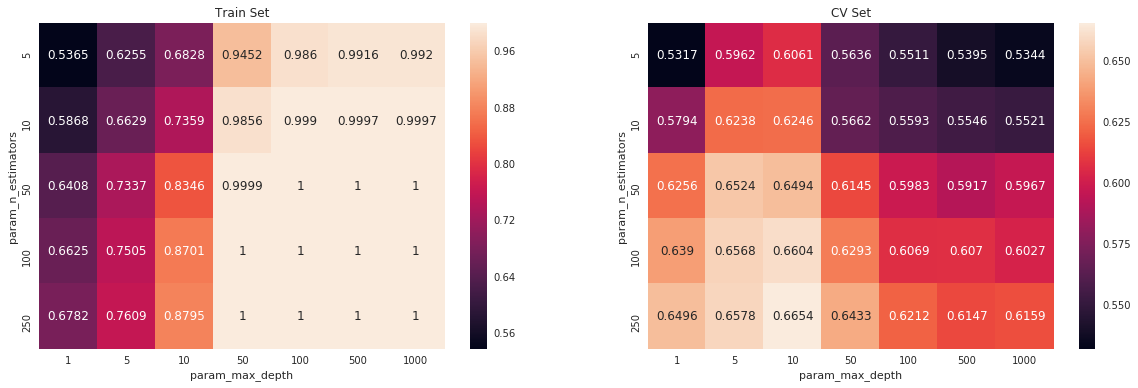

In [83]:
import seaborn as sns; sns.set()


max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [84]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier()


parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}

clf2 = GridSearchCV(rfc2, parameters, cv=3, scoring='roc_auc')
se2 = clf2.fit(X_tr2, y_train)

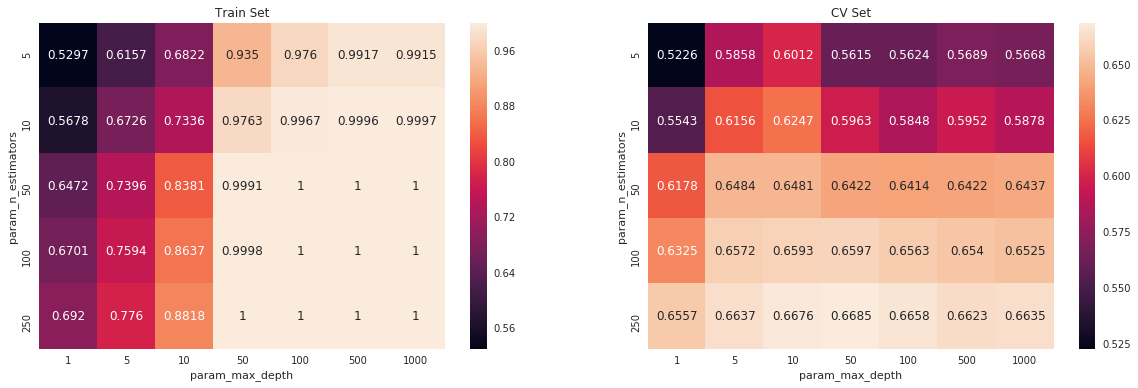

In [85]:
max_scores2 = pd.DataFrame(clf2.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores2.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores2.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [86]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc3 = RandomForestClassifier()


parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}

clf3 = GridSearchCV(rfc3, parameters, cv=3, scoring='roc_auc')
se3 = clf3.fit(X_tr3, y_train)

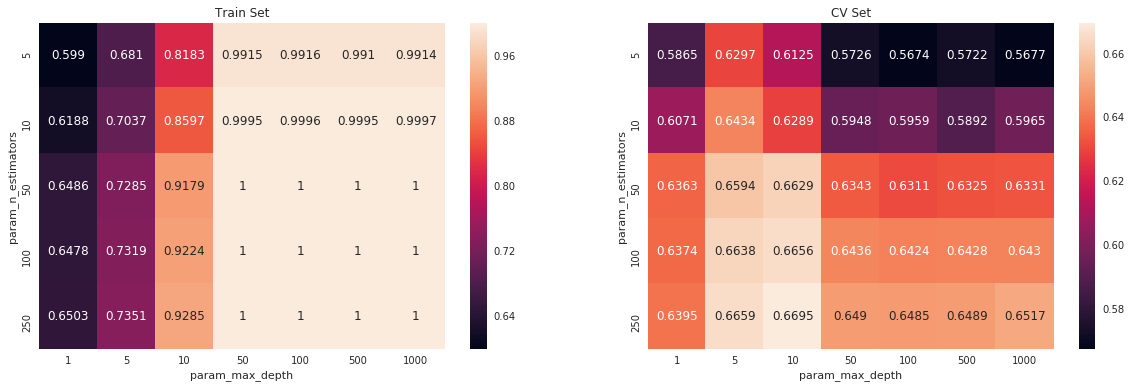

In [87]:
max_scores3 = pd.DataFrame(clf3.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores3.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores3.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [88]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc4 = RandomForestClassifier()


parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}

clf4 = GridSearchCV(rfc4, parameters, cv=3, scoring='roc_auc')
se4 = clf4.fit(X_tr4, y_train)

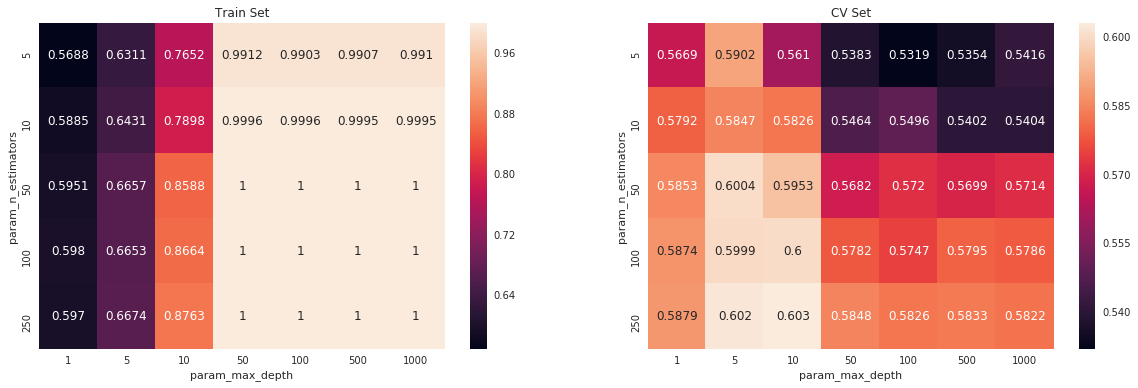

In [89]:
max_scores4 = pd.DataFrame(clf4.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores4.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores4.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### ROC Curve

#### SET1

In [91]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

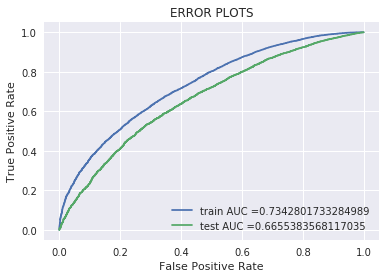

In [92]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


clf11 = RandomForestClassifier(max_depth = 5, n_estimators = 250)
#clfV1 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

clf11.fit(X_tr1, y_train)
#clfV1.fit(X_tr1, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred1 = batch_predict(clf11, X_tr1)    
y_test_pred1 = batch_predict(clf11, X_te1)

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

#### Confusion Matrix

In [93]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.4411488786869883 for threshold 0.842
the maximum value of tpr*(1-fpr) 0.38659258717989453 for threshold 0.842


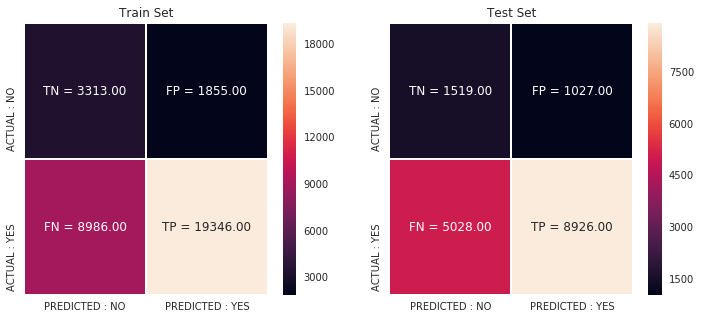

In [94]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

#### SET2

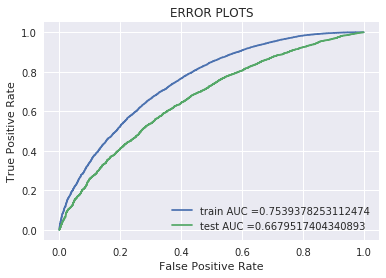

In [95]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve


from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction import DictVectorizer


clf2 = RandomForestClassifier(max_depth = 5, n_estimators = 250)
#clfV2 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

#vect = DictVectorizer(sparse=False)
#trans = vect.fit_transform(X_te2)

clf2.fit(X_tr2, y_train)
#clfV2.fit(X_tr2, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred2 = batch_predict(clf2, X_tr2)    
y_test_pred2 = batch_predict(clf2, X_te2)

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)

plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

#### Confusion Matrix

In [96]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.467613336602837 for threshold 0.846
the maximum value of tpr*(1-fpr) 0.38929921351954194 for threshold 0.843


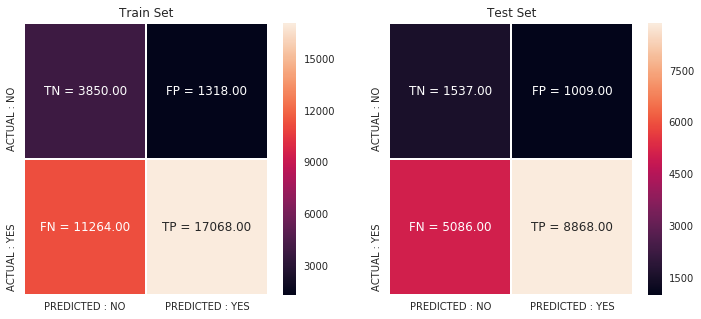

In [97]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred2, tr_thresholds2, train_fpr2, train_tpr2))
con_m_test = confusion_matrix(y_test, predict(y_test_pred2, te_thresholds2, test_fpr2, test_tpr2))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

#### SET3

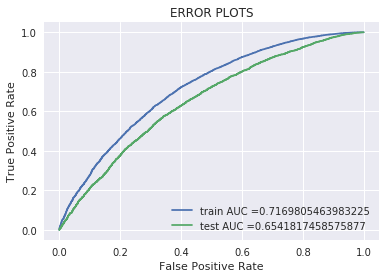

In [98]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.metrics import roc_curve, auc


clf3 = RandomForestClassifier(max_depth = 5, n_estimators = 250)
clf3.fit(X_tr3, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred3 = batch_predict(clf3, X_tr3)    
y_test_pred3 = batch_predict(clf3, X_te3)

train_fpr3, train_tpr3, tr_thresholds3 = roc_curve(y_train, y_train_pred3)
test_fpr3, test_tpr3, te_thresholds3 = roc_curve(y_test, y_test_pred3)

plt.plot(train_fpr3, train_tpr3, label="train AUC ="+str(auc(train_fpr3, train_tpr3)))
plt.plot(test_fpr3, test_tpr3, label="test AUC ="+str(auc(test_fpr3, test_tpr3)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

#### Confusion Matrix

In [99]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.43470823230872857 for threshold 0.847
the maximum value of tpr*(1-fpr) 0.37843138734035886 for threshold 0.854


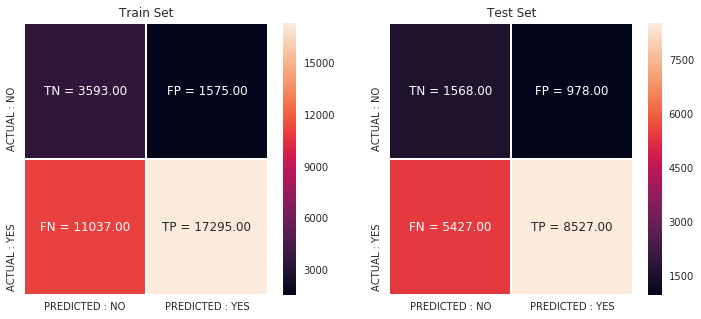

In [100]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred3, tr_thresholds3, train_fpr3, train_tpr3))
con_m_test = confusion_matrix(y_test, predict(y_test_pred3, te_thresholds3, test_fpr3, test_tpr3))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

#### SET4

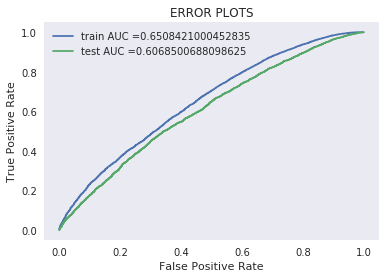

In [101]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve


from sklearn.metrics import roc_curve, auc


clf4 = RandomForestClassifier(max_depth = 5, n_estimators = 250)
clf4.fit(X_tr4, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred4 = batch_predict(clf4, X_tr4)    
y_test_pred4 = batch_predict(clf4, X_te4)

train_fpr4, train_tpr4, tr_thresholds4 = roc_curve(y_train, y_train_pred4)
test_fpr4, test_tpr4, te_thresholds4 = roc_curve(y_test, y_test_pred4)

plt.plot(train_fpr4, train_tpr4, label="train AUC ="+str(auc(train_fpr4, train_tpr4)))
plt.plot(test_fpr4, test_tpr4, label="test AUC ="+str(auc(test_fpr4, test_tpr4)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### Confusion Matrix

In [102]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.3607941935384466 for threshold 0.845
the maximum value of tpr*(1-fpr) 0.33085899117974993 for threshold 0.842


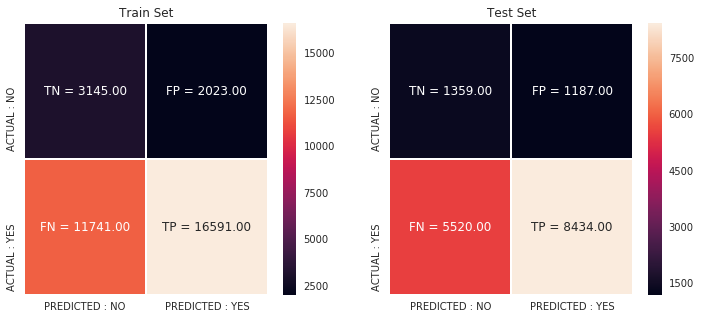

In [103]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred4, tr_thresholds4, train_fpr4, train_tpr4))
con_m_test = confusion_matrix(y_test, predict(y_test_pred4, te_thresholds4, test_fpr4, test_tpr4))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [104]:
#https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearnfrom sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

rfc1 = XGBClassifier()

for i in tqdm(parameters) :
    parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}

    clf1 = GridSearchCV(rfc1, parameters, cv=3, scoring='roc_auc')
    se1 = clf1.fit(X_tr1, y_train)
    


100%|██████████| 2/2 [7:59:03<00:00, 14366.97s/it]  


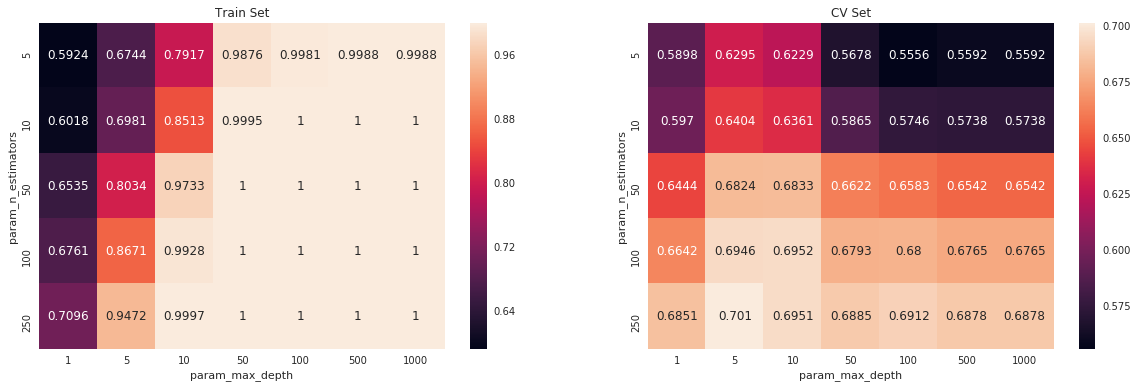

In [105]:
import seaborn as sns; sns.set()


max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### ROC Curve

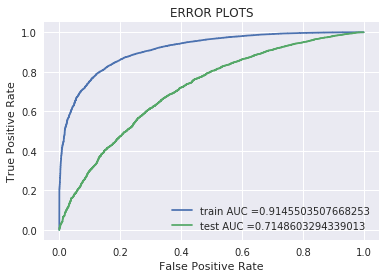

In [106]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc


clf1 = XGBClassifier(max_depth = 5, n_estimators = 250)
#clfV1 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

clf1.fit(X_tr1, y_train)
#clfV1.fit(X_tr1, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred1 = batch_predict(clf1, X_tr1)    
y_test_pred1 = batch_predict(clf1, X_te1)

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

### Confusion Matrix

In [107]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.695841701055464 for threshold 0.793
the maximum value of tpr*(1-fpr) 0.43821124306877013 for threshold 0.853


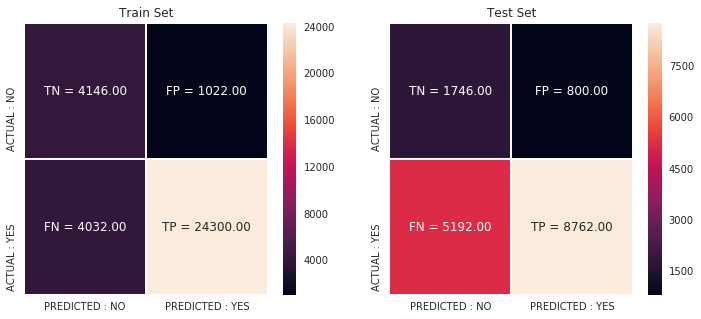

In [108]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [109]:
#https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearnfrom sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

rfc2 = XGBClassifier()

for i in tqdm(parameters) :
    parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}

    clf2 = GridSearchCV(rfc2, parameters, cv=3, scoring='roc_auc')
    se2 = clf2.fit(X_tr2, y_train)
    


100%|██████████| 2/2 [17:00:17<00:00, 30644.76s/it] 


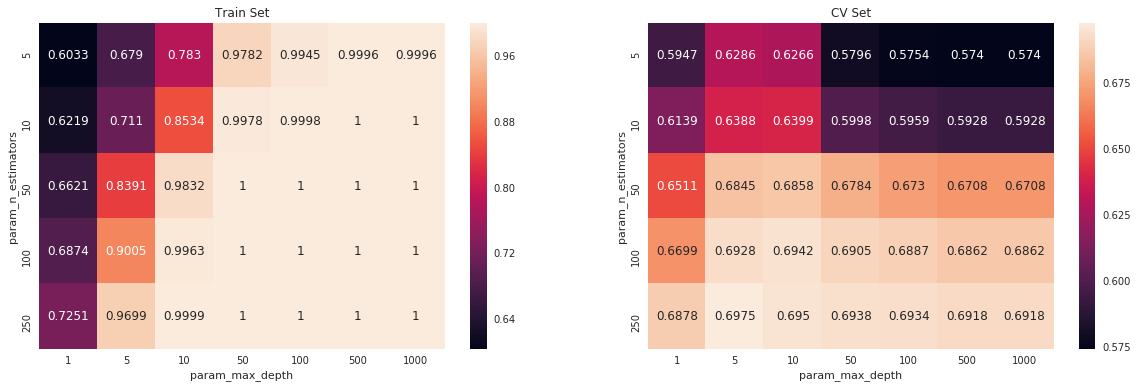

In [112]:
import seaborn as sns; sns.set()


max_scores2 = pd.DataFrame(clf2.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores2.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores2.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### ROC Curve

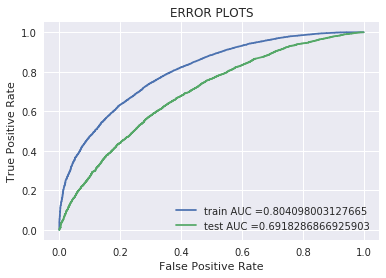

In [113]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve


from xgboost import XGBClassifier


clf2 = XGBClassifier(max_depth = 5, n_estimators = 50)
#clfV2 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

#vect = DictVectorizer(sparse=False)
#trans = vect.fit_transform(X_te2)

clf2.fit(X_tr2, y_train)
#clfV2.fit(X_tr2, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred2 = batch_predict(clf2, X_tr2)    
y_test_pred2 = batch_predict(clf2, X_te2)

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)

plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

### Confusion Matrix

In [114]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.5210365845662815 for threshold 0.836
the maximum value of tpr*(1-fpr) 0.41116006683839756 for threshold 0.846


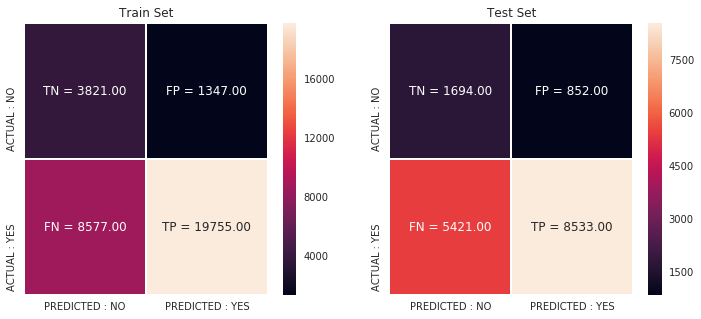

In [115]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred2, tr_thresholds2, train_fpr2, train_tpr2))
con_m_test = confusion_matrix(y_test, predict(y_test_pred2, te_thresholds2, test_fpr2, test_tpr2))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [110]:
#https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearnfrom sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

rfc3 = XGBClassifier()

for i in tqdm(parameters) :
    parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}

    clf3 = GridSearchCV(rfc3, parameters, cv=3, scoring='roc_auc')
    se3 = clf3.fit(X_tr3, y_train)
    


100%|██████████| 2/2 [5:19:13<00:00, 9490.54s/it]  


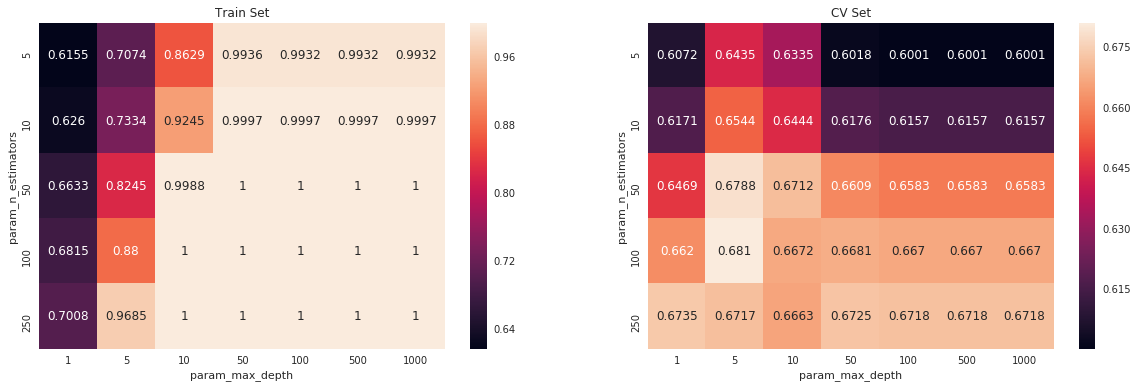

In [116]:
import seaborn as sns; sns.set()


max_scores3 = pd.DataFrame(clf3.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores3.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores3.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### ROC Curve

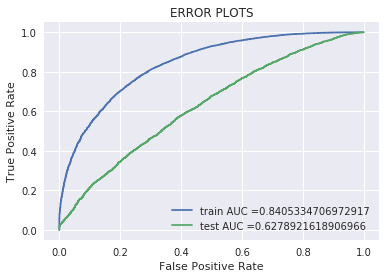

In [117]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.metrics import roc_curve, auc


clf3 = XGBClassifier(max_depth = 5, n_estimators = 100)
clf3.fit(X_tr3, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred3 = batch_predict(clf3, X_tr3)    
y_test_pred3 = batch_predict(clf3, X_te3)

train_fpr3, train_tpr3, tr_thresholds3 = roc_curve(y_train, y_train_pred3)
test_fpr3, test_tpr3, te_thresholds3 = roc_curve(y_test, y_test_pred3)

plt.plot(train_fpr3, train_tpr3, label="train AUC ="+str(auc(train_fpr3, train_tpr3)))
plt.plot(test_fpr3, test_tpr3, label="test AUC ="+str(auc(test_fpr3, test_tpr3)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

### Confusion Matrix

In [118]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.572050062417798 for threshold 0.838
the maximum value of tpr*(1-fpr) 0.34754750796607997 for threshold 0.853


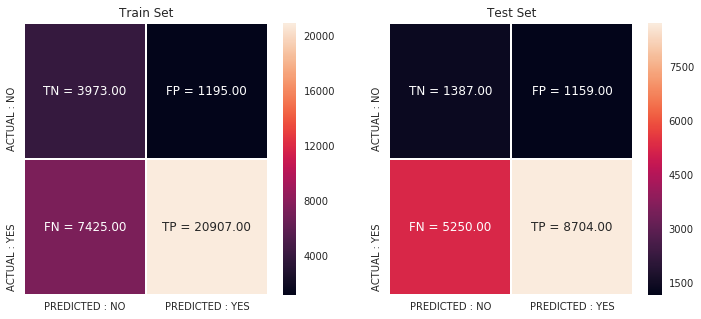

In [119]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred3, tr_thresholds3, train_fpr3, train_tpr3))
con_m_test = confusion_matrix(y_test, predict(y_test_pred3, te_thresholds3, test_fpr3, test_tpr3))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [111]:
#https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearnfrom sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

rfc4 = XGBClassifier()

for i in tqdm(parameters) :
    parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 250]}

    clf4 = GridSearchCV(rfc4, parameters, cv=3, scoring='roc_auc')
    se4 = clf4.fit(X_tr4, y_train)
    


100%|██████████| 2/2 [7:13:41<00:00, 13124.10s/it]  


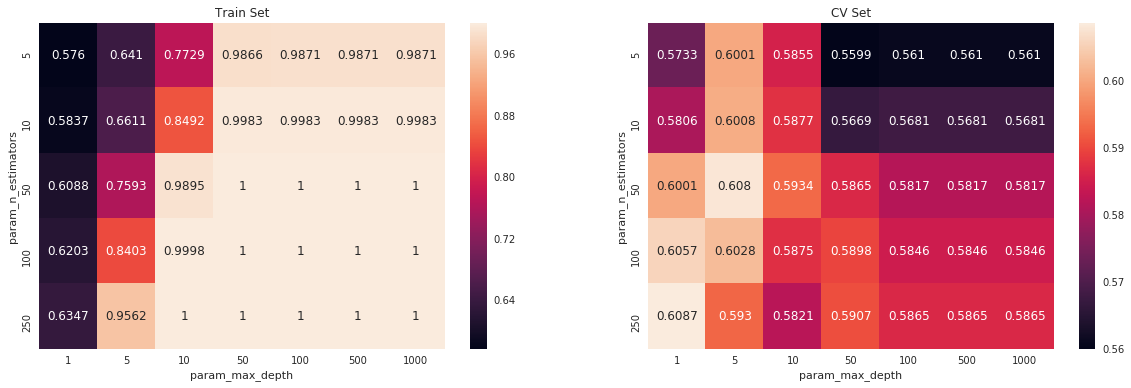

In [120]:
max_scores4 = pd.DataFrame(clf4.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores4.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores4.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### ROC Curve

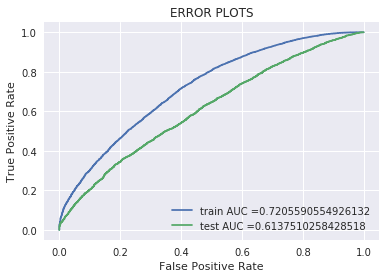

In [121]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve


from sklearn.metrics import roc_curve, auc


clf4 = XGBClassifier(max_depth = 5, n_estimators = 50)
clf4.fit(X_tr4, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred4 = batch_predict(clf4, X_tr4)    
y_test_pred4 = batch_predict(clf4, X_te4)

train_fpr4, train_tpr4, tr_thresholds4 = roc_curve(y_train, y_train_pred4)
test_fpr4, test_tpr4, te_thresholds4 = roc_curve(y_test, y_test_pred4)

plt.plot(train_fpr4, train_tpr4, label="train AUC ="+str(auc(train_fpr4, train_tpr4)))
plt.plot(test_fpr4, test_tpr4, label="test AUC ="+str(auc(test_fpr4, test_tpr4)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

### Confusion Matrix

In [122]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.43008718986156624 for threshold 0.846
the maximum value of tpr*(1-fpr) 0.329905093843862 for threshold 0.85


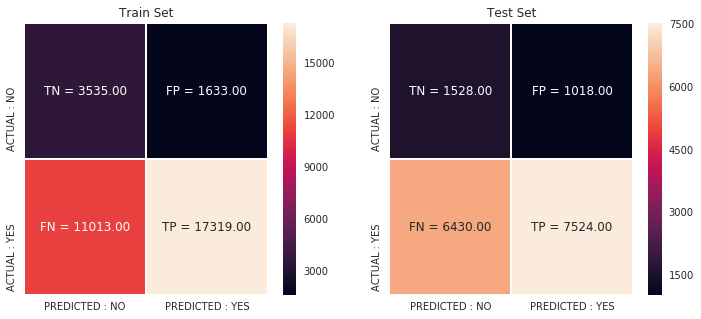

In [123]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred4, tr_thresholds4, train_fpr4, train_tpr4))
con_m_test = confusion_matrix(y_test, predict(y_test_pred4, te_thresholds4, test_fpr4, test_tpr4))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

<h1>3. Conclusions</h1>

In [124]:
# Please compare all your models using Prettytable library

# Please compare all your models using Prettytable library

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "HyperParameter1(max_depth)", "HyperParameter2(n_estimators)", "AUC"]
                 
    
x.add_row(["BOW", "RF", 5, 250, 0.665])
x.add_row(["BOW", "XGBOOST", 5, 250, 0.71])

x.add_row(["TFIDF", "RF", 5, 250, 0.6672])
x.add_row(["TFIDF", "XGBOOST", 5, 50, 0.691])

x.add_row(["Avg W2V", "RF", 5, 250, 0.654])
x.add_row(["Avg W2V", "XGBOOST", 5, 100, 0.627])

x.add_row(["TFIDF-W2V", "RF", 5, 250, 0.606])
x.add_row(["TFIDF-W2V", "XGBOOST", 5, 50, 0.613])



                 
print(x)

+------------+---------+----------------------------+-------------------------------+--------+
| Vectorizer |  Model  | HyperParameter1(max_depth) | HyperParameter2(n_estimators) |  AUC   |
+------------+---------+----------------------------+-------------------------------+--------+
|    BOW     |    RF   |             5              |              250              | 0.665  |
|    BOW     | XGBOOST |             5              |              250              |  0.71  |
|   TFIDF    |    RF   |             5              |              250              | 0.6672 |
|   TFIDF    | XGBOOST |             5              |               50              | 0.691  |
|  Avg W2V   |    RF   |             5              |              250              | 0.654  |
|  Avg W2V   | XGBOOST |             5              |              100              | 0.627  |
| TFIDF-W2V  |    RF   |             5              |              250              | 0.606  |
| TFIDF-W2V  | XGBOOST |             5            

### Observations

**As it can be seen from the above table, that the model is performing better than random model, from all the sets, BOW is working fairly well having AUC score of 0.71 for XGBOOST is the highest**

### Steps Followed

I took **50000 datapoints ** for my analysis and building my model

- I splitted the dataset into train, cv and test dataset
- Preprocessed all the text fetaures
- Vectorized all the text, categorical and numerical features, for text i used BOW & TFIDF
- Merged all features using hstack as instructed
- Using train dataset, i plotted my AUC curve using GridSearchCV using 3Fold Cross Validation for both categories
- from AUC curve, i picked best alpha.
using best alpha, i plotted ROC curve on train and test data.
- Then i plotted my confusion matrix for both the sets.
- Atlast you can see my result in tabular format.
- **i repeat the above steps for XGBOOST as well, not much diference is ther between results of RF & XGBOOST, XGBOOST took more computation time, and the results of XGBOOST are slightly better.**
- ** i used RESPONSE CODING for vectorization of categorical data, wrote my own function for it. **